In [2]:
import pandas as pd

df = pd.read_csv('../data/student_dropout.csv')

In [3]:
# Basic Dataset Overview
df.shape
df.columns
df.head()
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [4]:
# Data Quality Checks
df.info()
df.describe(include='all')  # to see categorical stats
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

np.int64(0)

In [7]:
# Target Column Exploration
df['Target'].value_counts()
df['Target'].value_counts(normalize=True)

Target
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64

# 🧾 Day 1 Summary – Initial Data Exploration

### 📊 Dataset Overview
- Total records: `5`
- Total features: `35`
- Source: Kaggle – Predict Student Dropout and Academic Success
- Dataset includes demographic, academic, and socioeconomic variables

---

### 🎯 Target Variable: `Target`
- **Graduate**: 49.9%
- **Dropout**: 32.1%
- **Enrolled**: 17.9%
- Class imbalance is present but not extreme
- Suitable for **multi-class classification** or **binary dropout prediction**

---

### 🧼 Data Quality
- Missing values: Use `df.isnull().sum()` to identify specific fields
- Duplicates: `df.duplicated().sum()` (should be near zero)
- Categorical columns like `'Marital status'`, `'Application mode'`, and `'Gender'` will require encoding
- Numerical columns appear clean and ready for EDA

---

### ✅ Next Steps (Planned for Day 2)
- Visualize target class distribution
- Explore correlations between key academic variables and dropout
- Start preprocessing plan: encoding, feature selection, imbalance handling

---

### 💾 Status
- Dataset loaded and verified
- Basic structure and target classes understood
- Notebook saved to `notebooks/eda.ipynb`

In [ ]:
# Day 2

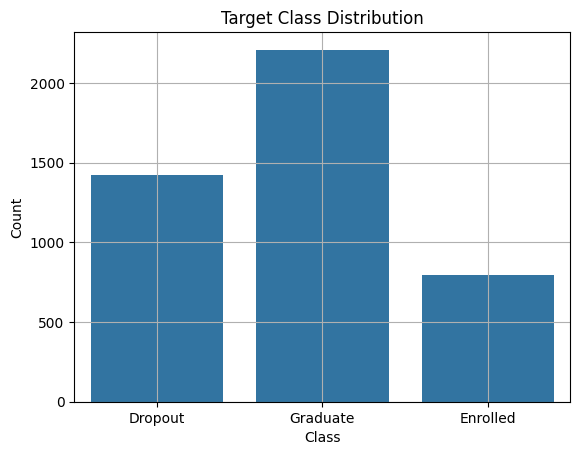

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [4]:
numerics = [
    'Age at enrollment',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 2nd sem (enrolled)',
]

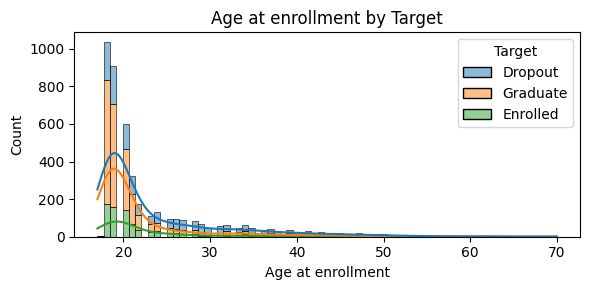

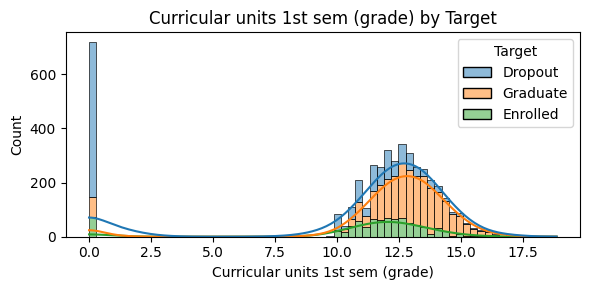

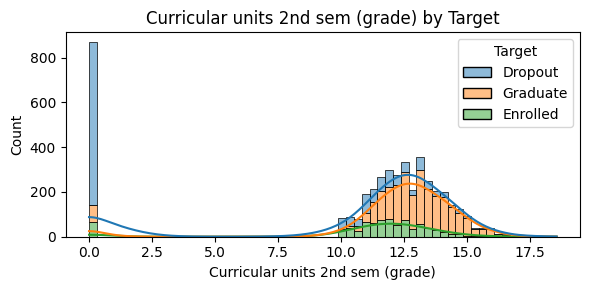

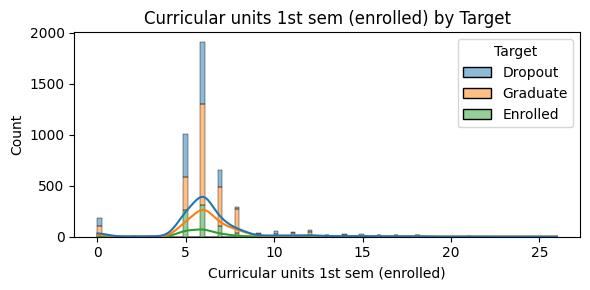

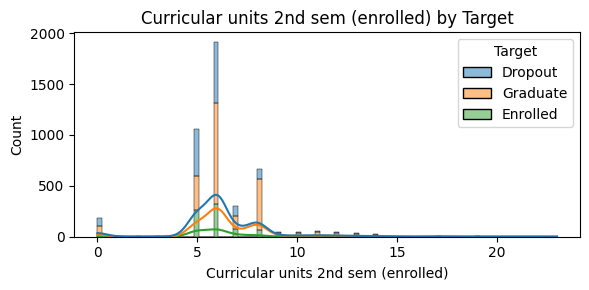

In [5]:
for col in numerics:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df, x=col, hue='Target', kde=True, multiple='stack')
    plt.title(f'{col} by Target')
    plt.tight_layout()
    plt.show()


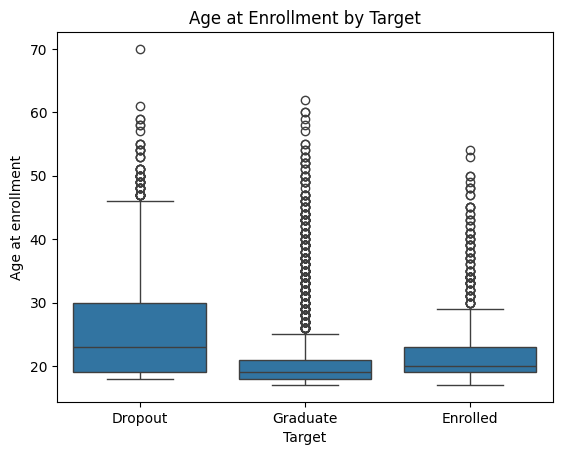

In [6]:
sns.boxplot(x='Target', y='Age at enrollment', data=df)
plt.title('Age at Enrollment by Target')
plt.show()

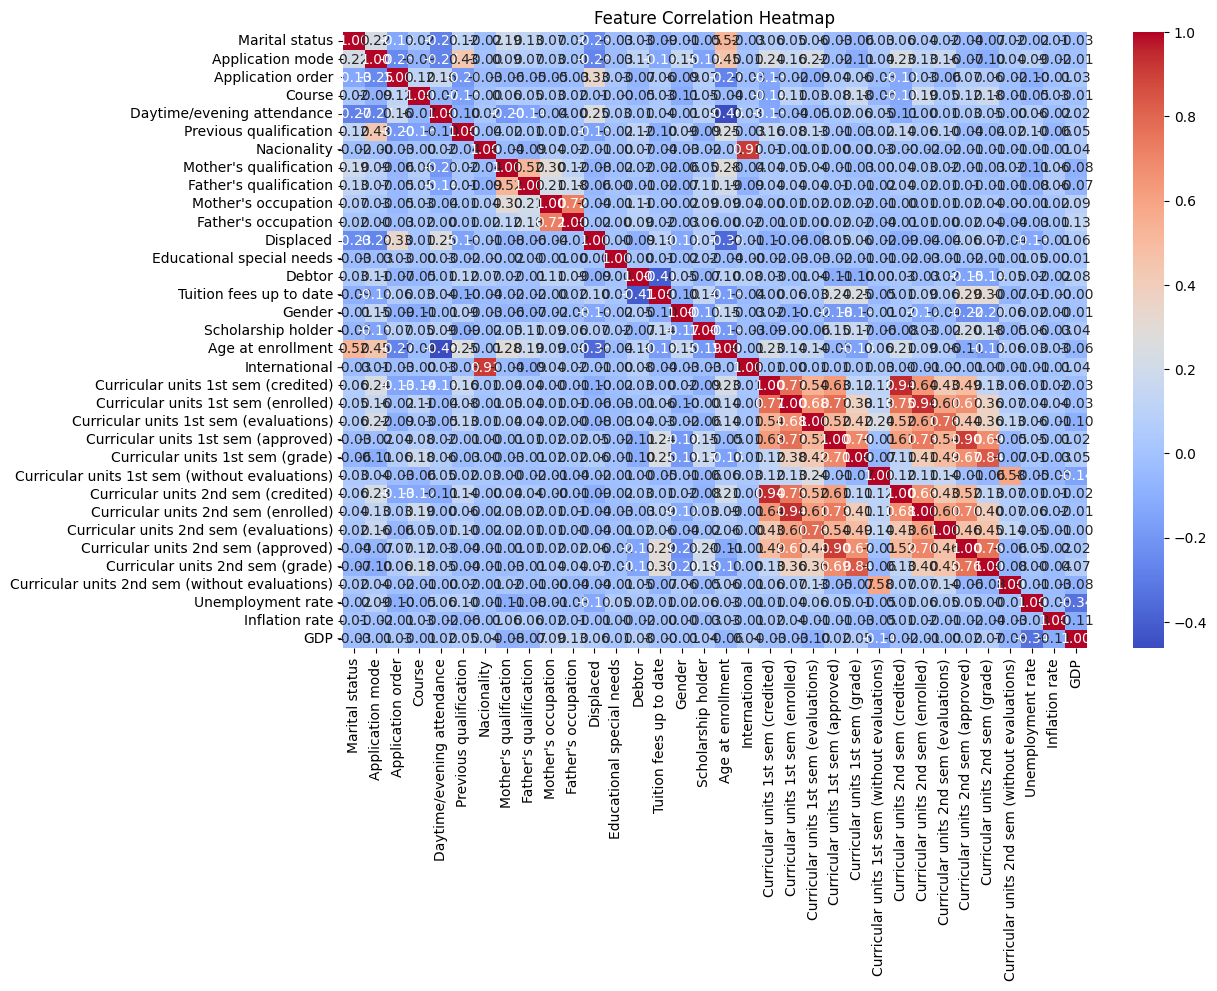

In [7]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

### 📊 Visual Insights Summary

- Target classes are imbalanced: Dropout ~32%, Graduate ~50%, Enrolled ~18%
- Key differences in grades and enrollment units between dropouts vs graduates
- Older students may have slightly higher dropout rates
- Some 1st and 2nd semester features show strong correlation with the target
- Categorical features need encoding next